In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,HC_same_state,age,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,13,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,58,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,25,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provider', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'HC_same_state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		


### Job title and seniority 

In [6]:
df['job_sim'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_sim.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_sim, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

###  Fix state Los Angeles 

In [9]:
df['job_state'] = df.job_state.apply(lambda x:x.strip() if x.strip().lower() != 'los angels' else 'CA')
df.job_state.value_counts()
# df.drop('job_state',inplace=True,axis=1)

CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
WA              21
NC              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
IN              10
UT              10
AZ               9
MO               9
AL               8
GA               6
KY               6
DE               6
MI               6
CT               5
IA               5
LA               4
OR               4
NE               4
NM               3
KS               3
ID               2
MN               2
Los Angeles      1
RI               1
SC               1
Name: job_state, dtype: int64

###  Job description length 

In [10]:
df['descri_len'] = df['Job Description'].apply(lambda x: len(x))
df['descri_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: descri_len, Length: 742, dtype: int64

### Competitor count


In [11]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)


In [12]:
df['num_comp'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64


### hourly wage to annual 


In [13]:
df['min_salary'] = df.apply(lambda x :x.min_salary*2 if x.hourly ==1 else x.min_salary,axis=1)
df['max_salary'] = df.apply(lambda x :x.max_salary*2 if x.hourly ==1 else x.max_salary,axis=1)

In [14]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


### remove new line from job title

In [15]:
df['company_text'] = df.company_text.apply(lambda x: x.replace('\n',''))

In [16]:
df['company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_text, Length: 742, dtype: object

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provider', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'HC_same_state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'job_sim', 'seniority',
       'descri_len', 'num_comp'],
      dtype='object')

<Axes: >

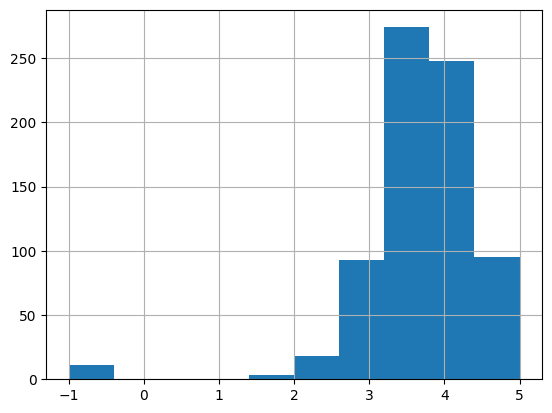

In [18]:
df.Rating.hist()

<Axes: >

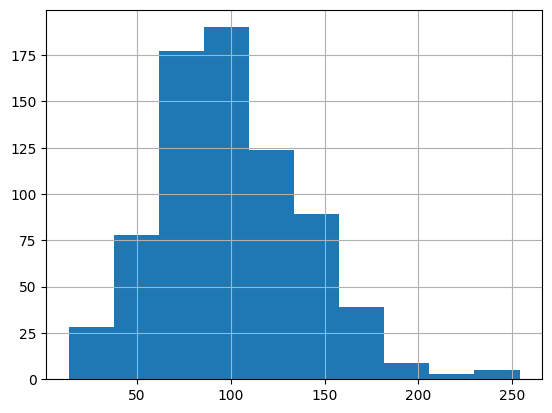

In [19]:
df.avg_salary.hist()

<Axes: >

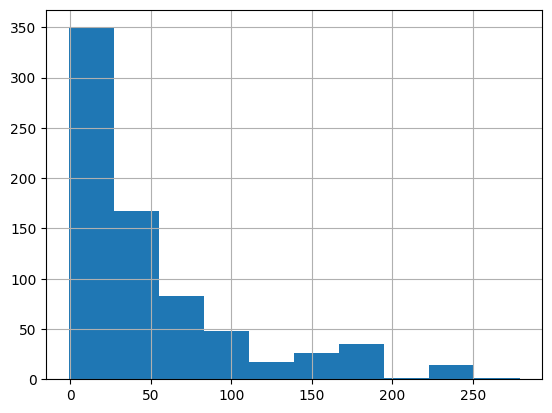

In [20]:
df.age.hist()

<Axes: >

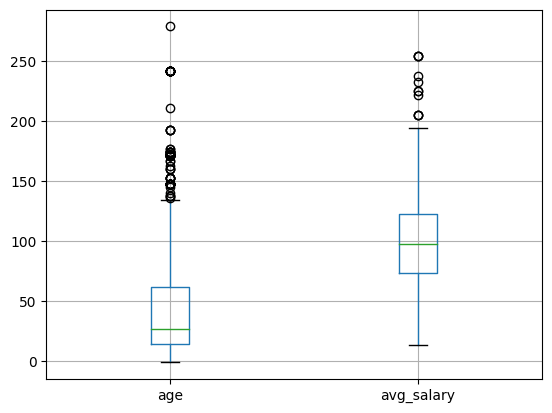

In [21]:
df.boxplot(column=['age','avg_salary'])

<Axes: >

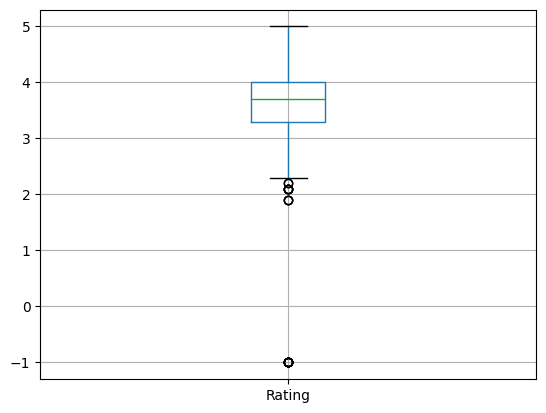

In [22]:
df.boxplot(column=['Rating'])

### Correlation b/w diff feature

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provider', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'HC_same_state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'job_sim', 'seniority',
       'descri_len', 'num_comp'],
      dtype='object')

In [24]:
corrr = df[['age','avg_salary','Rating','descri_len','num_comp']].corr()

<Axes: >

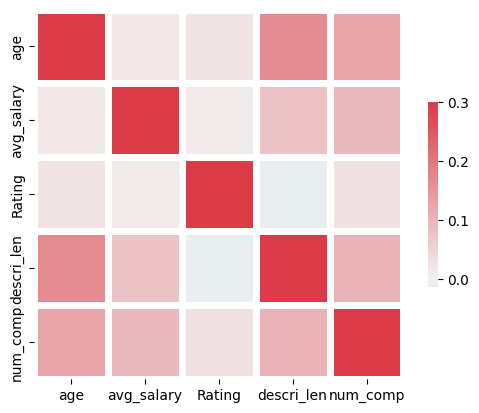

In [25]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corrr,vmax=.3,center=0,cmap=cmap,square=True,linewidths=5,cbar_kws={'shrink':.5})

In [26]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_text','job_state', 'HC_same_state',
    'python','r_studio', 'spark', 'aws', 'excel', 'job_sim', 'seniority']]

Graph for Location: total = 200


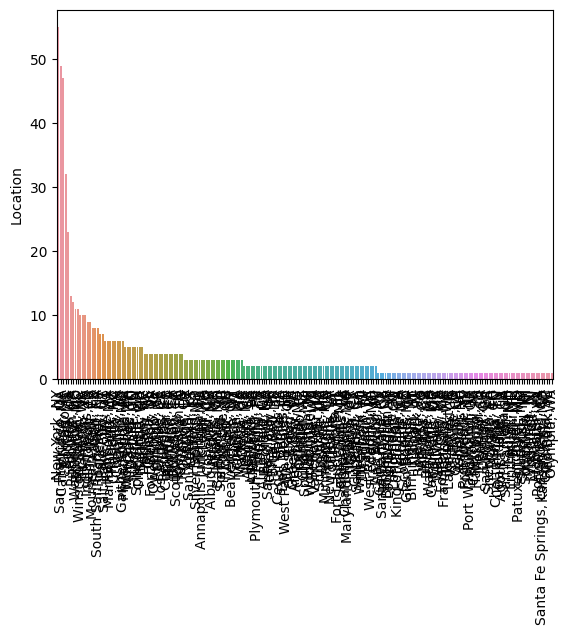

Graph for Headquarters: total = 198


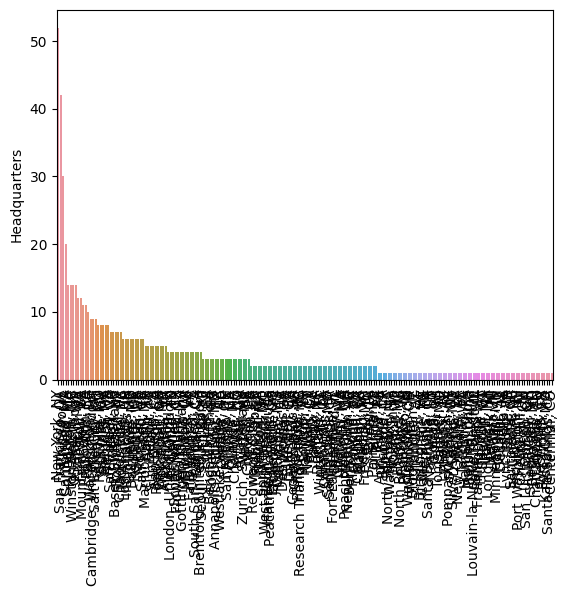

Graph for Size: total = 9


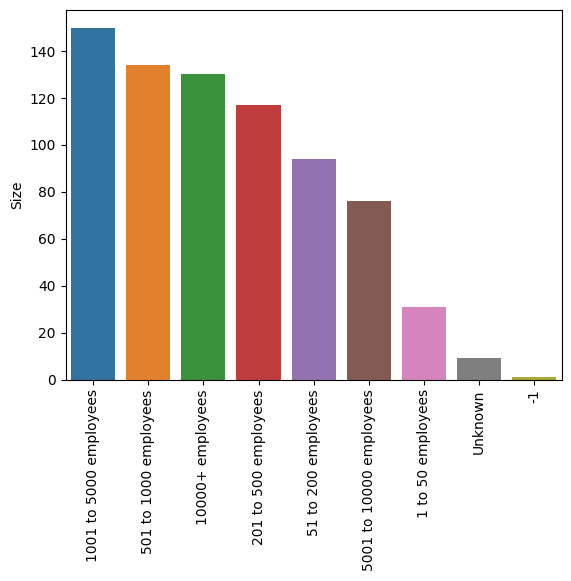

Graph for Type of ownership: total = 11


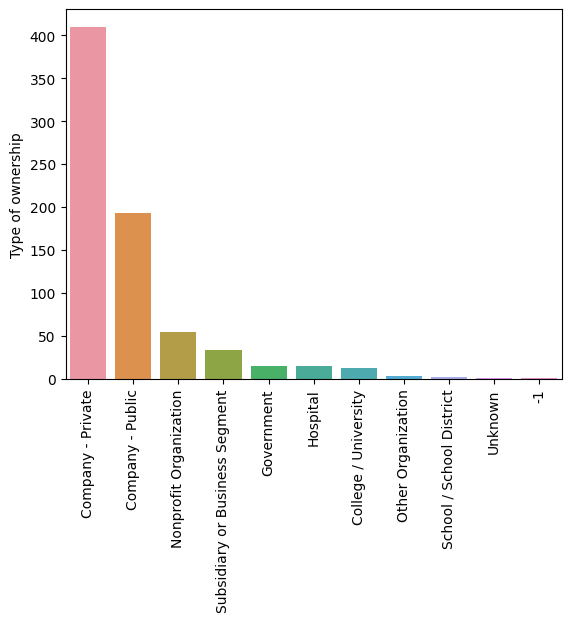

Graph for Industry: total = 60


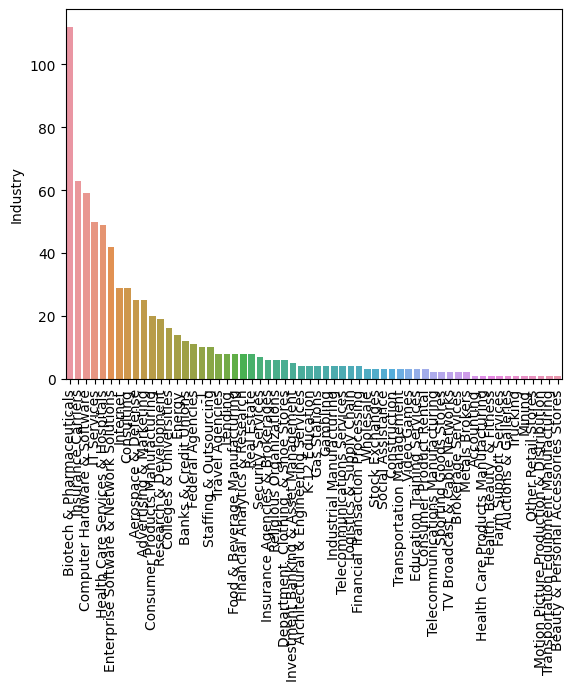

Graph for Sector: total = 25


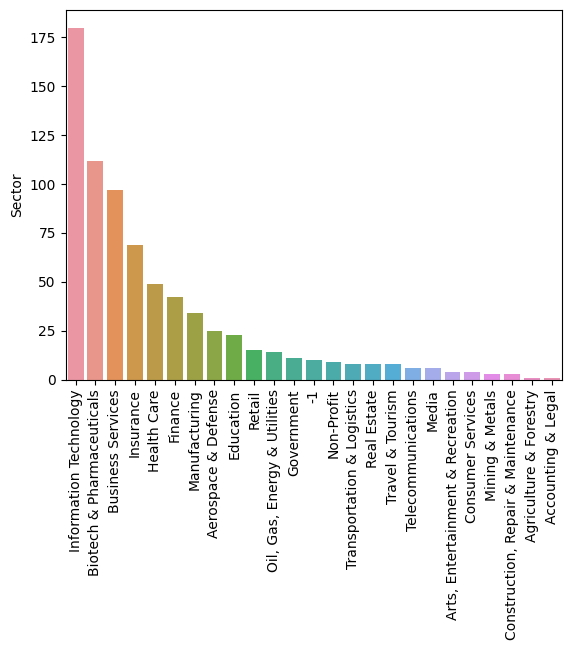

Graph for Revenue: total = 14


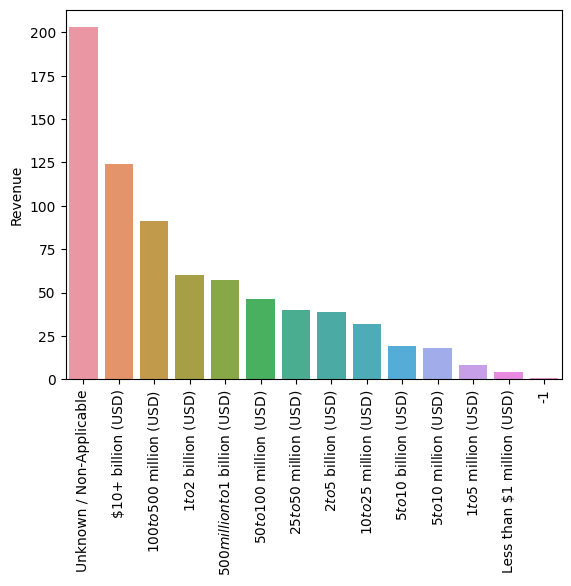

Graph for company_text: total = 343


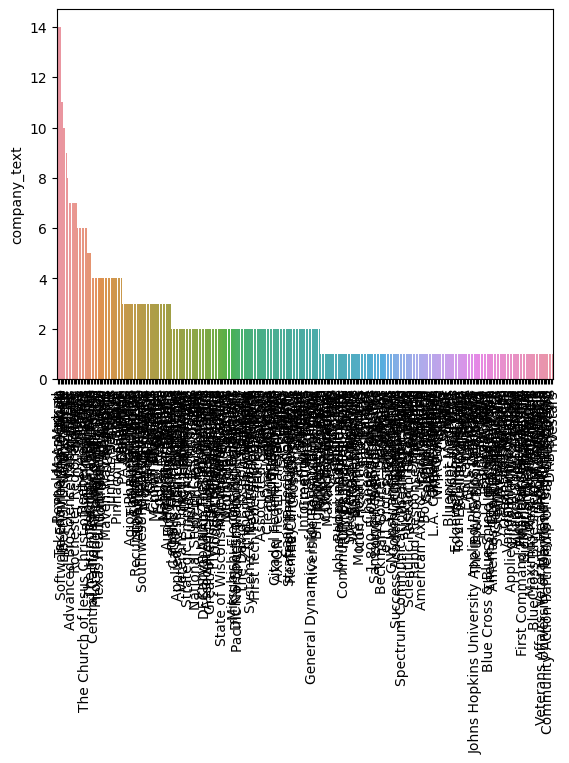

Graph for job_state: total = 38


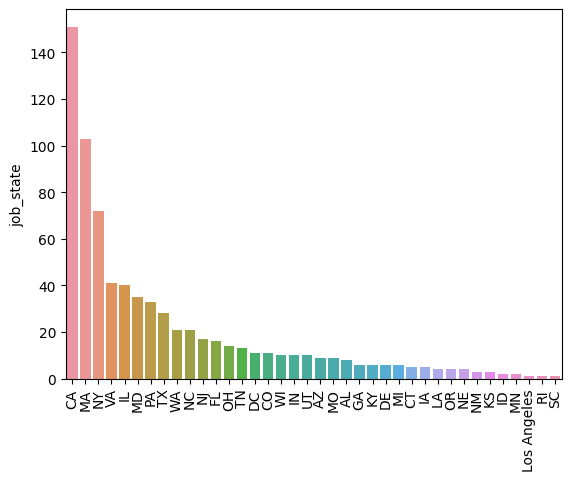

Graph for HC_same_state: total = 2


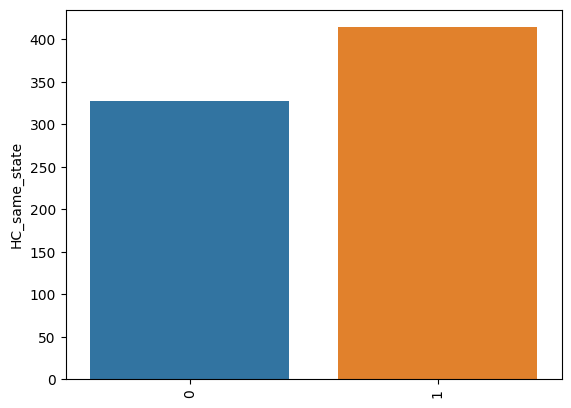

Graph for python: total = 2


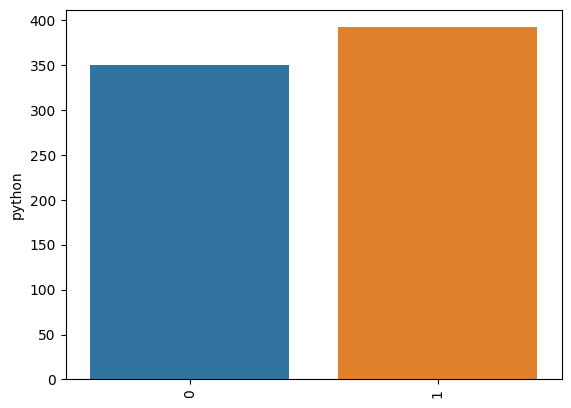

Graph for r_studio: total = 2


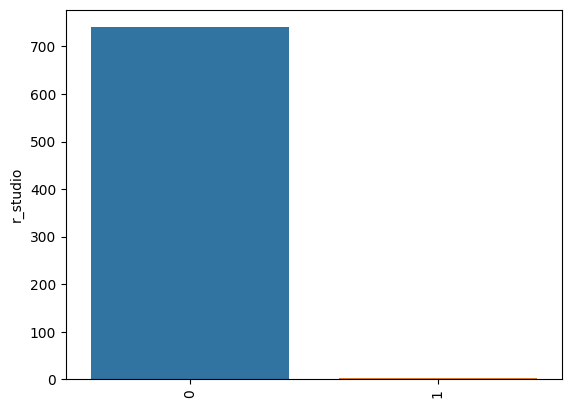

Graph for spark: total = 2


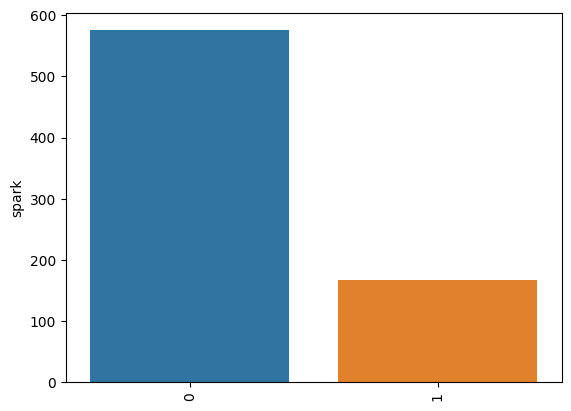

Graph for aws: total = 2


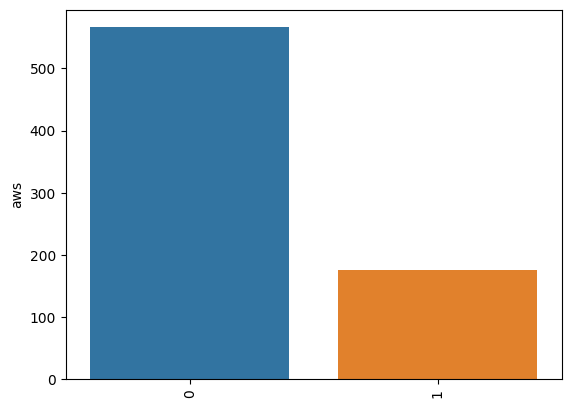

Graph for excel: total = 2


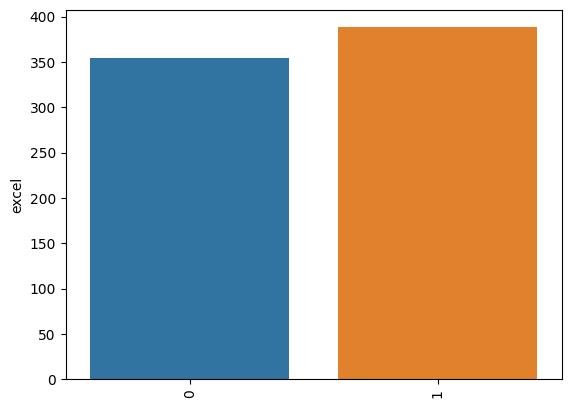

Graph for job_sim: total = 7


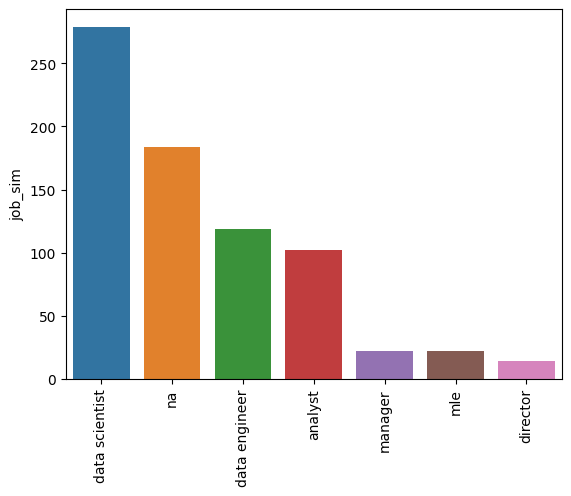

Graph for seniority: total = 3


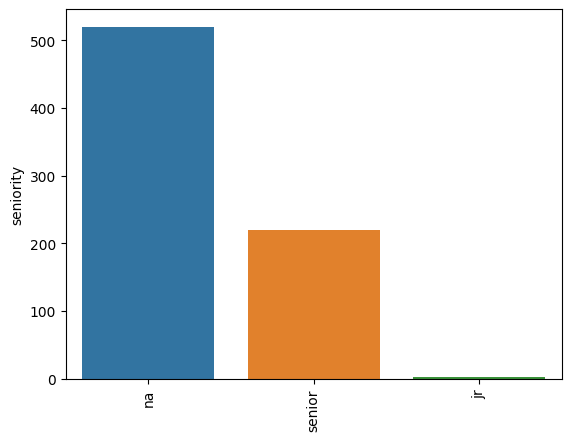

In [27]:
for i in df_cat.columns:
    cat_nums = df_cat[i].value_counts()
    print('Graph for %s: total = %d' % (i,len(cat_nums)))
    sns.barplot(x=cat_nums.index,y=cat_nums,data=df_cat)
    # chart.set_xticklabels(chart.get_xticklabels(). rotation = 90)
    plt.xticks(rotation=90)
    plt.show()

Graph for Location: total = 20


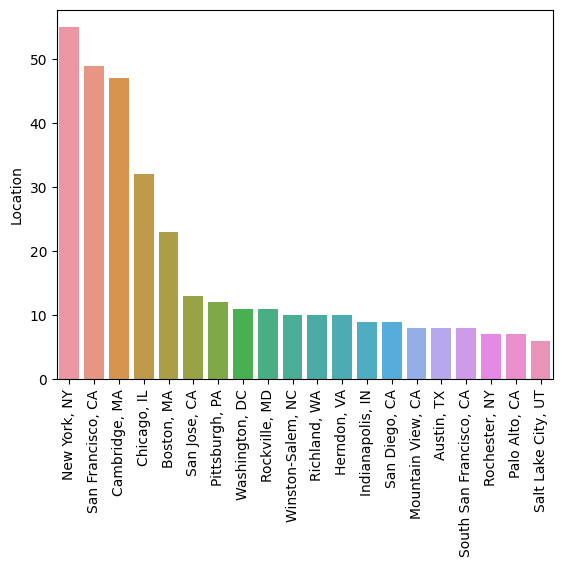

Graph for Headquarters: total = 20


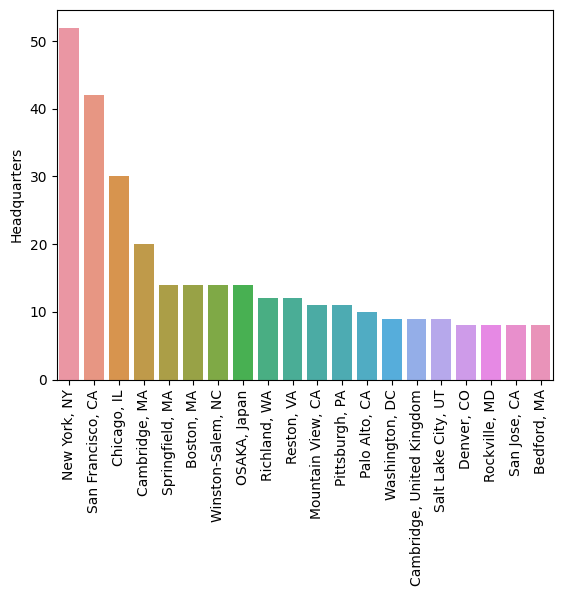

Graph for company_text: total = 20


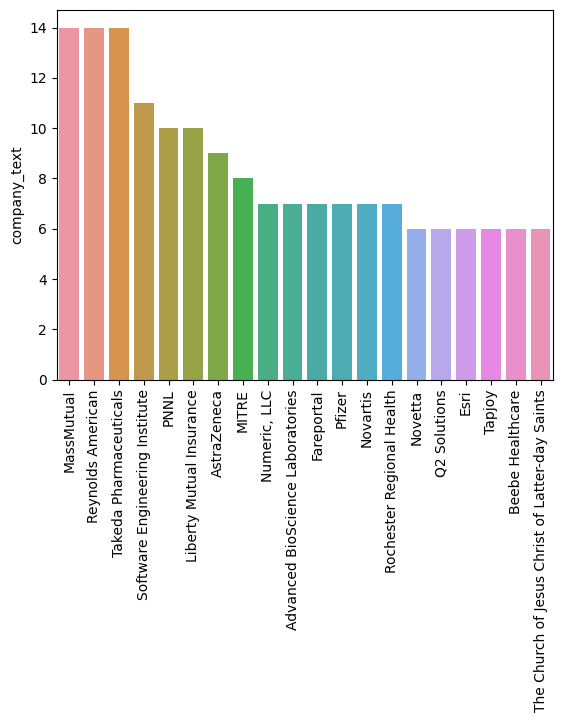

In [28]:
for i in df_cat[['Location','Headquarters','company_text']].columns:
    cat_nums = df_cat[i].value_counts()[:20]
    print('Graph for %s: total = %d' % (i,len(cat_nums)))
    sns.barplot(x=cat_nums.index,y=cat_nums,data=df_cat)
    # chart.set_xticklabels(chart.get_xticklabels(). rotation = 90)
    plt.xticks(rotation=90)
    plt.show()

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provider', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'HC_same_state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'job_sim', 'seniority',
       'descri_len', 'num_comp'],
      dtype='object')

In [30]:
pd.pivot_table(df,index='job_sim',values='avg_salary')

,avg_salary
job_sim,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [31]:
pd.pivot_table(df,index=['job_sim','seniority'],values='avg_salary')

avg_salary
job_sim        seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [32]:
pd.set_option('display.max_row',None)

In [33]:
pd.pivot_table(df,index=['job_state','job_sim'],values='avg_salary',aggfunc='count').sort_values('job_state',ascending = False)

avg_salary
job_state   job_sim                   
WI          na                       4
            data scientist           3
            analyst                  3
WA          na                       1
            data scientist          17
            analyst                  3
VA          na                       5
            mle                      2
            data scientist          18
            data engineer           10
            analyst                  6
UT          data engineer            3
            analyst                  4
            data scientist           3
TX          na                       7
            data scientist          13
            data engineer            8
TN          data scientist           1
            data engineer           10
            analyst                  2
SC          na                       1
RI          analyst                  1
PA          manager                  3
            data engineer            1
            data scientist           6
            analyst                  8
            mle                      7
            na                       8
OR          data scientist           3
            data engineer            1
OH          na                       3
            data scientist           7
            analyst                  4
NY          na                      12
            mle                      2
            data scientist          40
            data engineer            4
            analyst                 14
NM          data scientist           3
NJ          data scientist           4
            analyst                  6
            data engineer            2
            manager                  2
            director                 2
            na                       1
NE          na                       4
NC          na                      12
            data scientist           3
            data engineer            6
MO          na                       3
            manager                  1
            data scientist           3
            analyst                  2
MN          data engineer            1
            analyst                  1
MI          data scientist           4
            manager                  2
MD          na                      16
            data scientist          13
            data engineer            3
            analyst                  3
MA          na                      46
            manager                  5
            director                 6
            data scientist          30
            data engineer           12
            analyst                  4
Los Angeles data scientist           1
LA          analyst                  1
            data engineer            2
            na                       1
KY          na                       4
            data scientist           2
KS          mle                      3
IN          na                       4
            data scientist           2
            data engineer            4
IL          analyst                  3
            na                       6
            mle                      2
            director                 6
            data scientist          15
            data engineer            8
ID          analyst                  2
IA          analyst                  2
            data engineer            3
GA          data scientist           3
            na                       3
FL          data scientist           7
            data engineer            3
            analyst                  6
DE          na                       6
DC          data scientist           5
            data engineer            4
            analyst                  2
CT          na                       3
            data scientist           2
CO          mle                      1
            data engineer            3
            analyst                  1
            na                       3
           

In [34]:
pd.pivot_table(df[df.job_sim == 'data scientist'],index=['job_state'],values='avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'employer_provider', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'HC_same_state', 'age', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'job_sim', 'seniority',
       'descri_len', 'num_comp'],
      dtype='object')

In [36]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','num_comp' ,
          'hourly', 'employer_provider', 'python','r_studio',
          'spark', 'aws', 'excel','Type of ownership','avg_salary']]

In [37]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [38]:
pd.pivot_table(df_pivots,index= 'Revenue', columns='python',values='avg_salary',aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [39]:
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

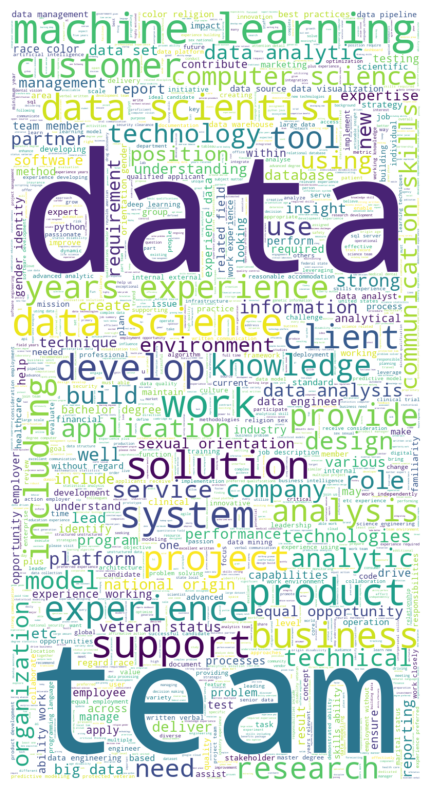

In [40]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [41]:
df.to_csv('eda_data.csv')